## Unit 2, Lesson 2. Challenge:  Feature transformation and selection

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline

In [3]:
df=pd.read_csv("../GBvideos.csv")

In [4]:
df.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...


In [5]:
# which are numerical variables?
df.describe()

,category_id,views,likes,dislikes,comment_count
count,23371.000000,2.337100e+04,2.337100e+04,2.337100e+04,2.337100e+04
mean,17.858414,3.624420e+06,8.986616e+04,6.920528e+03,1.018606e+04
std,7.623867,1.282597e+07,2.589323e+05,6.284157e+04,5.018664e+04
min,1.000000,8.510000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,10.000000,1.489315e+05,3.591000e+03,1.220000e+02,4.215000e+02
50%,22.000000,5.341250e+05,1.411600e+04,4.690000e+02,1.517000e+03
75%,24.000000,2.022316e+06,6.345300e+04,2.021000e+03,5.675500e+03
max,29.000000,2.888120e+08,3.945009e+06,1.944971e+06,1.626501e+06


In [6]:
# can we use publish time in our analysis?
df.publish_time.describe()

count                        23371
unique                        2308
top       2018-02-08T02:00:01.000Z
freq                            40
Name: publish_time, dtype: object

In [7]:
# converting string to datetime 
df['new_publish_time'] = pd.to_datetime(df['publish_time'], format='%Y-%m-%dT%X.000Z')

# rounding to a nearest hour for further analysis of the best publishing time
df['new_publish_time_rounded'] = df['new_publish_time'].dt.round('1h')

In [8]:
# separating into publishing date and time for further analysis
df['new_publish_date'] = [d.date() for d in df['new_publish_time_rounded']]
df['new_publish_time_of_day'] = [d.time() for d in df['new_publish_time_rounded']]

In [9]:
# let's check what date & time were lucky to get into trending
df.iloc[:,17:20].describe()

,new_publish_time_rounded,new_publish_date,new_publish_time_of_day
count,23371,23371,23371
unique,1477,207,24
top,2018-01-22 16:00:00,2018-01-25,17:00:00
freq,114,466,2409
first,2007-03-05 16:00:00,NaN,NaN
last,2018-03-12 01:00:00,NaN,NaN


In [10]:
# how many unique days do we have in the dataset?
df.trending_date.describe()

count        23371
unique         117
top       18.03.01
freq           200
Name: trending_date, dtype: object

In [11]:
# converting string to datetime 
df['new_trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')

In [12]:
df.new_trending_date.describe()

count                   23371
unique                    117
top       2017-12-27 00:00:00
freq                      200
first     2017-11-14 00:00:00
last      2018-03-12 00:00:00
Name: new_trending_date, dtype: object

In [13]:
df.new_trending_date.value_counts().nlargest(3)

2017-12-27    200
2018-01-23    200
2017-12-15    200
Name: new_trending_date, dtype: int64

In [14]:
df.new_trending_date.value_counts().nsmallest(3)

2017-12-01    198
2018-02-01    199
2018-02-14    199
Name: new_trending_date, dtype: int64

In [15]:
# finding the time difference between publishing and trending 
df['btw_pub_trend'] = df['new_trending_date'] - df['new_publish_time']

# round this to days - we're more interested in days, 
# as the time when the video became trending is not given
df['btw_pub_trend'] = df['btw_pub_trend'].dt.round('1d')
df.iloc[25:27, 21]

25   4 days
26   3 days
Name: btw_pub_trend, dtype: timedelta64[ns]

In [16]:
# convert to int64 since hist gives us an error about the data type
# df['between_publishing_trending'].hist()
df['bw_pub_trend_days'] = (df['btw_pub_trend'].dt.round('1d')).dt.days


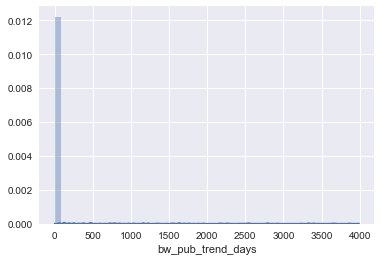

In [17]:
sns.distplot(df['bw_pub_trend_days'], bins = 50)
plt.show()

### DATA: YouTube - Trending [UK]

The data represents the archive of videos trending on YouTube in United Kingdom, collected via YouTube API. 

There were not a lot of explanations on which was the cutoff for the video to appear in Trending nor any criteria that could have contributed to the outcome. Also, it is not said if the data contains information about all the trending videos on that day, or only top ones. 

### Data deep-dive

The data collects information for 117 days from 2017-11-14 to 2018-03-12. Practically for every day, there're 200 Trending videos. There 28 days that have information about less than 200 videos by any reason (either 199 or 198 videos). 

##### Outcome variable: views

##### Let's choose six other (input) variables for the further analysis:
- Categorical: category_id, publishing time of the day
- Continuous: likes, dislikes, comment_count, bw_pub_trend_days

### Univariate analysis

In [18]:
print("There're " + str(len(df.columns)) + " variables in the dataset")

There're 23 variables in the dataset


In [19]:
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'new_publish_time',
       'new_publish_time_rounded', 'new_publish_date',
       'new_publish_time_of_day', 'new_trending_date', 'btw_pub_trend',
       'bw_pub_trend_days'],
      dtype='object')

In [20]:
df.describe()

,category_id,views,likes,dislikes,comment_count,btw_pub_trend,bw_pub_trend_days
count,23371.000000,2.337100e+04,2.337100e+04,2.337100e+04,2.337100e+04,23371,23371.000000
mean,17.858414,3.624420e+06,8.986616e+04,6.920528e+03,1.018606e+04,49 days 20:43:26.923109,49.863506
std,7.623867,1.282597e+07,2.589323e+05,6.284157e+04,5.018664e+04,310 days 17:17:42.931989,310.720636
min,1.000000,8.510000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0 days 00:00:00,0.000000
25%,10.000000,1.489315e+05,3.591000e+03,1.220000e+02,4.215000e+02,4 days 00:00:00,4.000000
50%,22.000000,5.341250e+05,1.411600e+04,4.690000e+02,1.517000e+03,8 days 00:00:00,8.000000
75%,24.000000,2.022316e+06,6.345300e+04,2.021000e+03,5.675500e+03,12 days 00:00:00,12.000000
max,29.000000,2.888120e+08,3.945009e+06,1.944971e+06,1.626501e+06,3989 days 00:00:00,3989.000000


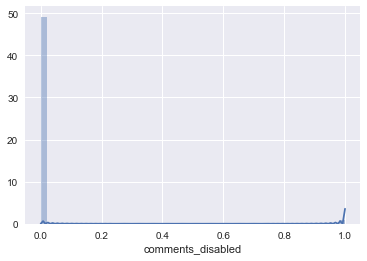

In [21]:
sns.distplot(df['comments_disabled'], bins = 50)

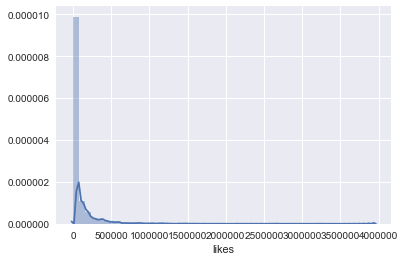

In [22]:
sns.distplot(df['likes'], bins = 50)

We have 23 variables and 23371 data points. From what I observed during pre-liminary cleaning - there're no missing data. 

#### Continious variables: 
- 'views'
- 'likes'
- 'dislikes'
- 'comment_count'
- 'publish_time' (string format)
- 'new_publish_time' (datetime format)
- 'new_publish_time_rounded' (to hour)
- 'new_publish_date' (only date)
- 'trending_date' (string format)
- 'new_trending_date'(datetime format)
- 'btw_pub_trend', (datedelta format)
- 'bw_pub_trend_days' (int format)


#### Categorical cariables: 
- 'video_id'
- 'title'
- 'channel_title' 
- 'category_id' (despite the fact that we see the variation and other numerical data)
- 'new_publish_time_of_day'
- 'tags'
- 'thumbnail_link' 
- 'comments_disabled' 
- 'ratings_disabled'
- 'video_error_or_removed'
- 'description'

#### Distribution

From my experience:
- Views, likes, dislikes, comment counts in this particular slice of videos are normally distributed with positive skew
- Variable 'bw_pub_trend_days' (days before videos appeared in Trending) is normally distributed with positive skew
- 'comments_disabled', 'ratings_disabled' and 'video_error_or_removed' follow binomial distribution
- other variables don't follow any particular distribution


 
#### Variation
The numerical values, that we can define variation (standart variation) are: views, likes, dislikes, comment counts and days before videos got viral. 

The variation is quite significant for them, the values of almost all these variables start at 0, but then range up to large numbers with several digits.

### Bivariate analysis

/Users/polinav/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


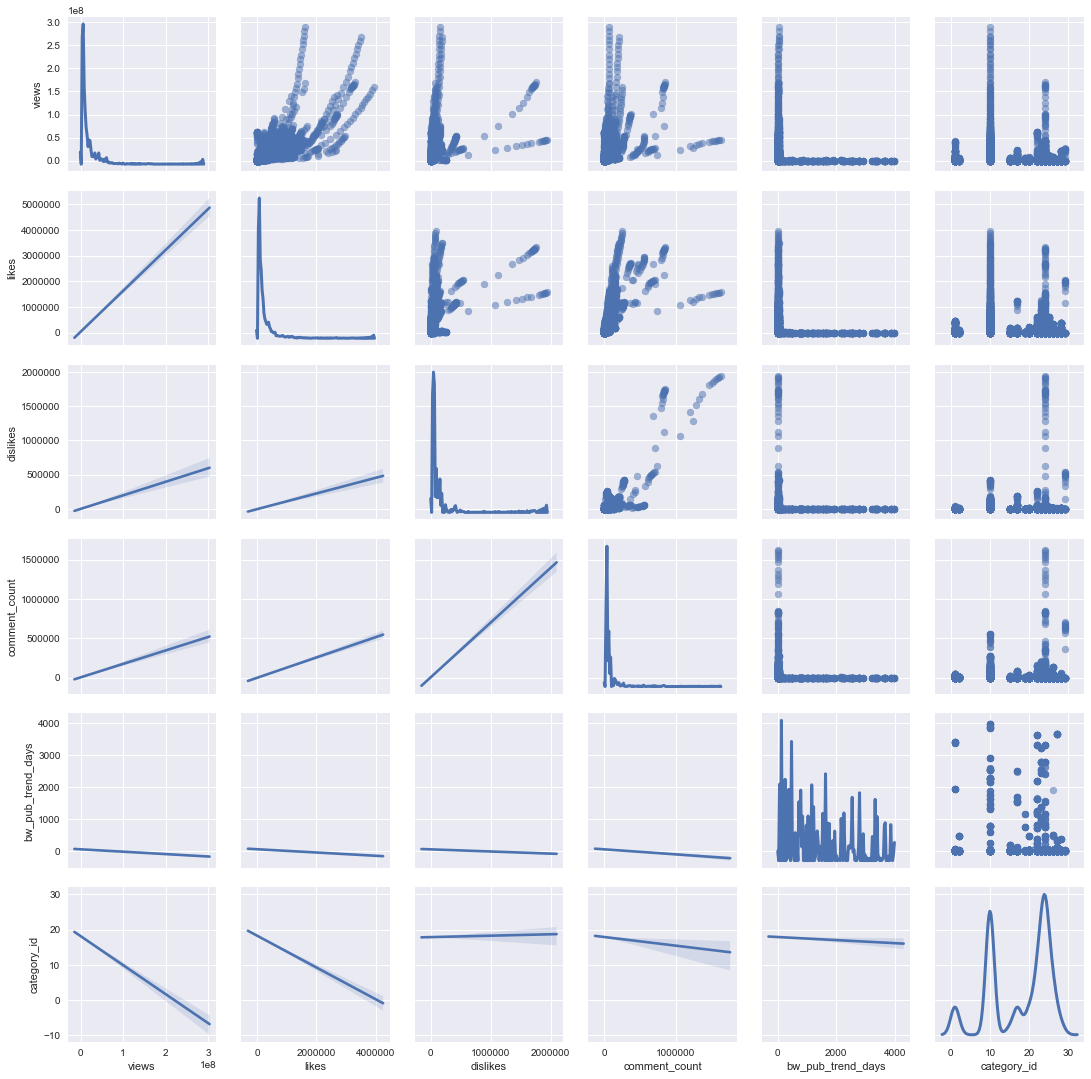

In [23]:
df_features = df[['views', 'likes', 'dislikes', 'comment_count', 'bw_pub_trend_days', 'category_id', 'new_publish_time_of_day']]
g = sns.PairGrid(df_features, diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

Correlation with outcome variable: 
Posivite correlation (in order of strenght descending): 
1. likes
2. dislikes
3. comments 

Negative correlation: 
1. Days between publising and trending - less correlated than other continious variables.

Other noticeable correlations: 
1. Comments and dislikes are strongly positively correlated.

### Feature Selection (filtered)

Here's the list of final 5 features that were filtered for the further model building.

1. 'likes' + 'dislikes': reflects engagement which doens't overlap
2. 'likes' + 'dislikes' + 'comment_count': total engagement
3. 'likes' - 'dislikes':  pure positive reaction 
4. ('likes' + 'dislikes') * 'comment_count': comments take more effort and can demostrate stronger reaction
5.  'comment_count' / 'bw_pub_trend_days': the longer days that the video remained on the platform without being in trending, the less engaging it can be. However, if the ratio comments/days is high - can be a hot topic

The filetering was made based on relevance for the outcome [views]. Through these features I tried to expresse the attributes of a video that could be good predictors. For example, the appeal of the video or pure positive reaction (espressed as likes - dislikes) can be reason why more people would watch it.

All these features are about how viewers react to video. They show us the behavior of users (they like, dislike, comment, ignore), so combinations of them will be interesting try in the future models. 

## Unit 3, Lesson 1. Challenge: Building regression models with different algorithms

In [24]:
X = df[['likes', 'dislikes', 'comment_count', 'bw_pub_trend_days']]
Y = df[['views']]

In [25]:
from sklearn import neighbors

knn_w = neighbors.KNeighborsRegressor(n_neighbors=5, weights='distance')
knn_w.fit(X, Y)

from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X, Y)

from sklearn.model_selection import cross_val_score

score_knn = cross_val_score(knn_w, X, Y, cv=10)
print("KNN Accuracy: %0.3f (+/- %0.3f)" % (score_knn.mean(), score_knn.std() * 2))

score_ols = cross_val_score(regr, X, Y, cv=10)
print("OLS Accuracy: %0.3f (+/- %0.3f)" % (score_ols.mean(), score_ols.std() * 2))


KNN Accuracy: 0.759 (+/- 0.178)
OLS Accuracy: 0.666 (+/- 0.262)


Improving the OLS model: after parameters evaluation we've seen that p-value for 'bw_pub_trend_days' was 0.7, which is not useful for our regression model. We'll exclude this variable and chech the results again, using statsmodels library.

In [26]:
import statsmodels.formula.api as smf

linear_formula = 'views ~ likes + dislikes + comment_count'

lm = smf.ols(formula=linear_formula, data=df_features).fit()

print('Formula parameters')
print(lm.params)

print('Pvalues of parameters')
print(lm.pvalues)
print('R-squared: ' + str(lm.rsquared))

print(lm.summary())


Formula parameters
Intercept        232080.055365
likes                49.524499
dislikes            111.258587
comment_count      -179.481018
dtype: float64
Pvalues of parameters
Intercept        0.000002
likes            0.000000
dislikes         0.000000
comment_count    0.000000
dtype: float64
R-squared: 0.702353651855
                            OLS Regression Results                            
Dep. Variable:                  views   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                 1.838e+04
Date:                Thu, 10 May 2018   Prob (F-statistic):               0.00
Time:                        19:59:01   Log-Likelihood:            -4.0151e+05
No. Observations:               23371   AIC:                         8.030e+05
Df Residuals:                   23367   BIC:                         8.031e+05
Df Model:                           3      

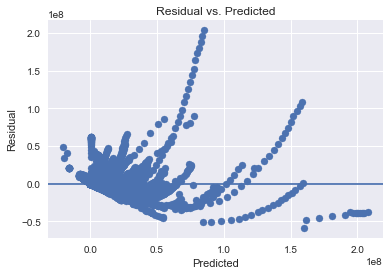

In [27]:
plt.scatter(lm.fittedvalues, lm.resid)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

Let's see what happens if we exclude from KNN model: 

In [28]:
X = df[['likes', 'dislikes', 'comment_count']]
Y = df[['views']]

knn_w = neighbors.KNeighborsRegressor(n_neighbors=5, weights='distance')
knn_w.fit(X, Y)

score_knn = cross_val_score(knn_w, X, Y, cv=10)
print("New KNN Accuracy: %0.2f (+/- %0.2f)" % (score_knn.mean(), score_knn.std() * 2))

New KNN Accuracy: 0.71 (+/- 0.25)


Interesting about the models: 
- While  exclusion of 'bw_pub_trend_days' from OLS regression model increased the ability to predict accurately, for the KNN it did the opposite. 
- Initially KNN with distance weights was showing better results than OLS. However, then it's easiers to tune in OLS to achieve better prediction accuracy. 
- KNN needs to always have data for training, whereas for OLS you can have a formula with the parameters you can use aside from training data
- Optimal number of neighbours for our model with our initial data is 5. KNN starts to perform worse than OLS when number of neighbours > 35 
- It seems that when we excluded a feature from dataset for KNN, the model needed more neightbours for more accurate predictions.
- OLS in our case is more prone to overfitting based on the standart deviation. 
- KNN without weights is less accurate than the one with weights, however, has a lower deviation. 
- OLS gives us a sense of positive or negative correlation between input and output with a estimators of the influence. 


## Including categorical data

### Categorical variables via Statsmodels (avoids dummy trap)
Looking at the summary printed below, notice that Statsmodels determined that elements of categorical were datetime.time strings, so it treated it as a categorical variable. Model's default is also to include an intercept, so we automatically dropped one of the categories.

If categorical had been an integer variable that we wanted to treat explicitly as categorical, we could have done so by using the C() operator.

In [29]:
linear_formula = 'views ~ likes + dislikes + + comment_count + new_publish_time_of_day'

lm = smf.ols(formula=linear_formula, data=df_features).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  views   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     2158.
Date:                Thu, 10 May 2018   Prob (F-statistic):               0.00
Time:                        19:59:02   Log-Likelihood:            -4.0136e+05
No. Observations:               23371   AIC:                         8.028e+05
Df Residuals:                   23344   BIC:                         8.030e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

### Categorical variables via Sklearn and Pandas methods

for the future: 
- for time make a feature that is daytime / nighttime / morning / evening
- better when it's an number, can be intensivity

In [30]:
X = df[['likes', 'dislikes', 'comment_count', 'bw_pub_trend_days', 'new_publish_time_of_day']]
Y = df[['views']]

#### Sklearn LabelEncoder and OneHotEncoder

In [31]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

X_cat = X[['new_publish_time_of_day']]

## check how the data transforms - 25th and 26th observation
print(X_cat.iloc[25:27, 0])

le = LabelEncoder()
X_cat_le = X_cat.apply(le.fit_transform)

## check how the data transforms - 25th and 26th observation
print(X_cat_le.iloc[25:27, 0])

ohe = OneHotEncoder()
X_cat_le_ohe = ohe.fit_transform(X_cat_le).toarray()

25    21:00:00
26    22:00:00
Name: new_publish_time_of_day, dtype: object
25    21
26    22
Name: new_publish_time_of_day, dtype: int64


In [32]:
df_cat = pd.DataFrame(data = X_cat_le_ohe, index = np.arange(0,23371), columns = 
                      ['%sH' % s for s in np.arange(0,24)] )

In [33]:
## check how the data transforms - 25th and 26th observation - should be in columns "21" and "22"
print(df_cat.iloc[25:27,])

     0H   1H   2H   3H   4H   5H   6H   7H   8H   9H ...   14H  15H  16H  17H  \
25  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
26  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   

    18H  19H  20H  21H  22H  23H  
25  0.0  0.0  0.0  1.0  0.0  0.0  
26  0.0  0.0  0.0  0.0  1.0  0.0  

[2 rows x 24 columns]


#### Pandas' get_dummies to get a dataframe with dummy variables

In [34]:
X_dum = pd.get_dummies(X['new_publish_time_of_day'])

### Concatinating dataframes with dummy variables and building a regression model via Sklearn

In [35]:
X = pd.concat([df[['likes', 'dislikes', 'comment_count', 'bw_pub_trend_days']], df_cat], axis=1)

In [36]:
## Regression model
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

score_ols = cross_val_score(regr, X, Y, cv=10)
print("\n OLS Accuracy via cross validation: %0.2f (+/- %0.2f)" % (score_ols.mean(), score_ols.std() * 2))


Coefficients: 
 [[  4.92620795e+01   1.09648217e+02  -1.76383529e+02  -7.35064402e+01
    8.88701264e+05  -7.86865014e+04   1.60496803e+06  -6.68563647e+05
    1.03513314e+05   3.50652721e+05  -6.76521307e+03  -1.21496897e+05
    2.49807112e+05  -1.66459320e+06  -4.12621483e+05   8.93010441e+05
   -4.26759203e+05  -1.58926531e+05   1.71286019e+06   6.16462327e+04
   -7.07523699e+05  -4.57301343e+05  -9.13206834e+05  -6.66506738e+05
    9.79365359e+05   1.12223004e+04  -8.58107583e+05   2.85311906e+05]]

Intercept: 
 [ 280594.21231236]

R-squared:
0.706216939875

 OLS Accuracy via cross validation: 0.66 (+/- 0.26)


In [37]:
## what about dummy var trap? for sklearn

## Challenge: Random Forest and Decision tree

### Predicting number of views

In [66]:
X = df[['likes', 'dislikes', 'comment_count', 'bw_pub_trend_days']]
Y = df[['views']]
X_dum = pd.get_dummies(X)

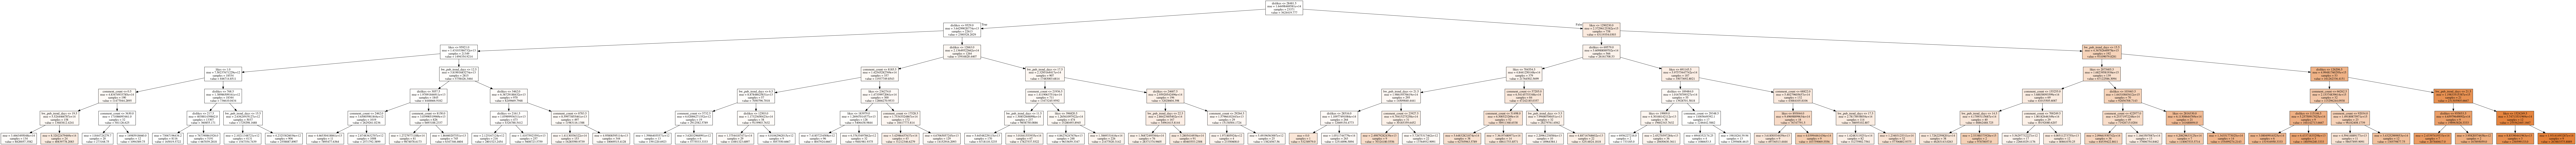

In [105]:
from sklearn import tree
from IPython.display import Image

import pydotplus
import graphviz
#one example
decision_tree = tree.DecisionTreeRegressor(
    max_features=2,
    max_depth=6,
random_state=400)
decision_tree.fit(X, Y)

dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X.columns,
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [106]:
cross_val_score(decision_tree, X, Y, cv=10)

array([ 0.73929174,  0.67297112,  0.87974283,  0.72633443,  0.21677722,
        0.523767  , -0.47497335,  0.45587358,  0.4011176 ,  0.640375  ])

### Predicting category of the video

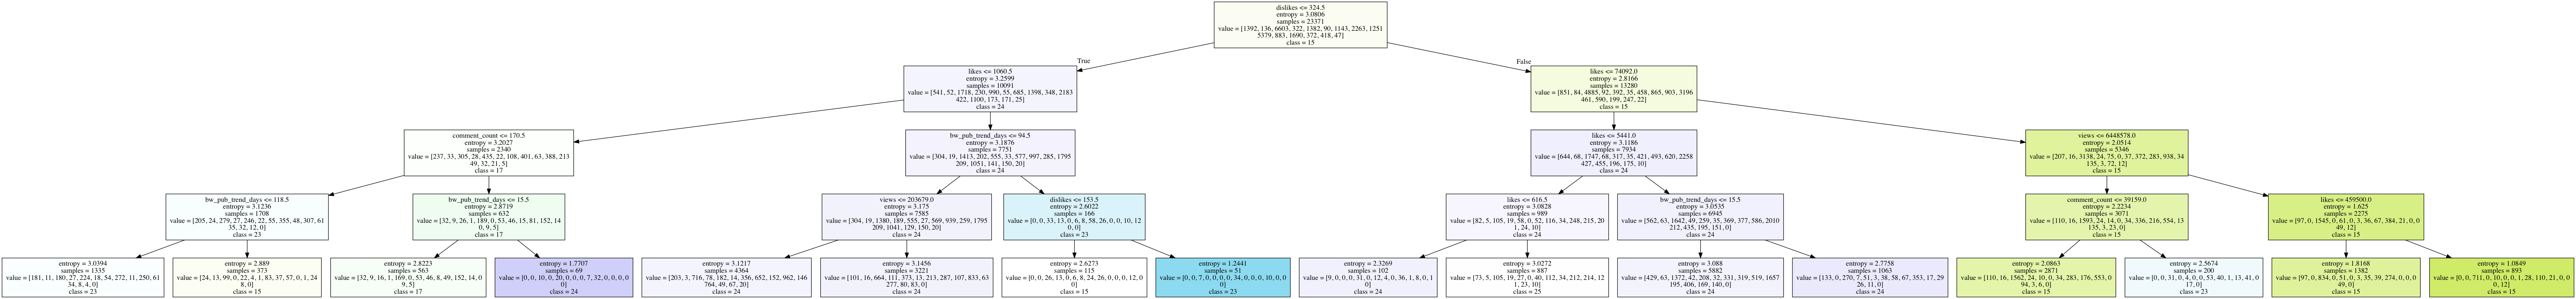

In [86]:
X1 = df[['likes', 'dislikes', 'comment_count', 'bw_pub_trend_days','views']]
Y1 = df[['category_id']]

decision_tree_class = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4, random_state = 400)
decision_tree_class.fit(X1, Y1)

dot_data = tree.export_graphviz(
    decision_tree_class, out_file=None,
    feature_names=X1.columns,
    filled=True,
    class_names=['1','2','15','10','17','19','22','23','20','24','25','26','27','28','29']
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [99]:
## gives an error
# cross_val_score(decision_tree_class, X1, Y1, cv=10)

### Random Forest

In [95]:
from sklearn import ensemble
#Y_array = Y.shape(23371,)
rfc = ensemble.RandomForestRegressor()

cross_val_score(rfc, X, Y, cv=10)

/Users/polinav/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/polinav/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/polinav/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/polinav/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:238: DataCon

array([ 0.81596998,  0.82339358,  0.91476869,  0.88623188,  0.79427722,
        0.81627771,  0.60403851,  0.65702292,  0.75624889,  0.83954233])

## Runtime measure

In [100]:
import time
start_time = time.time()
cross_val_score(ensemble.RandomForestRegressor(), X, Y, cv=10)
print("Random forest: %s seconds" % (time.time() - start_time))

/Users/polinav/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/polinav/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/polinav/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/polinav/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:238: DataCon

Random forest: 7.3082520961761475 seconds


In [107]:
start_time = time.time()
cross_val_score(tree.DecisionTreeRegressor(
    max_features=2,
    max_depth=6,
random_state=400), X, Y, cv=10)
print("Decision tree: %s seconds" % (time.time() - start_time))

Decision tree: 0.21005511283874512 seconds
